   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

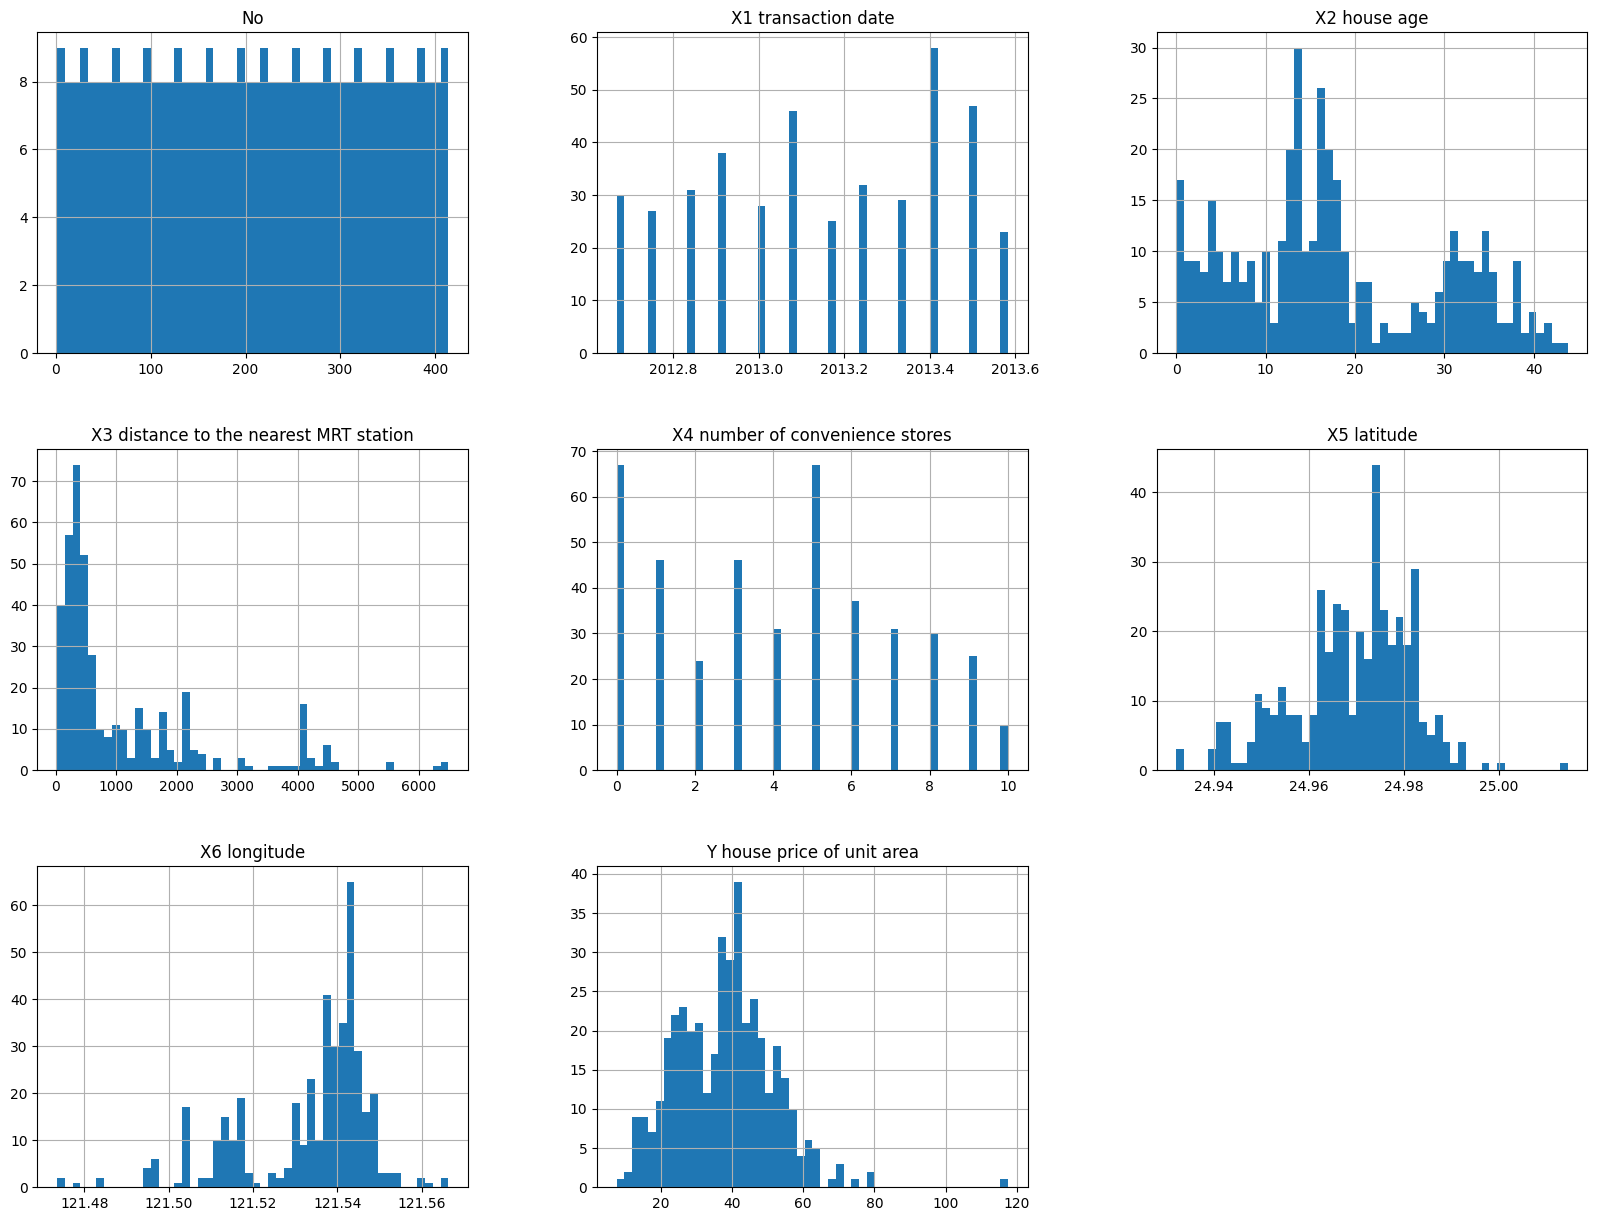

In [36]:
import pandas as pd
file  = 'https://raw.githubusercontent.com/SurajSahani-2000/real-estae-file-for-practice/refs/heads/main/Real%20estate.csv'
df  = pd.read_csv(file)
print(df.head())
print(df.columns)
df.info()
df.describe()
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [37]:
corr_matrix = df.corr()
corr_matrix['X2 house age'].sort_values(ascending= False)


,X2 house age
X2 house age,1.000000
X5 latitude,0.054420
X4 number of convenience stores,0.049593
X3 distance to the nearest MRT station,0.025622
X1 transaction date,0.017549
No,-0.032808
X6 longitude,-0.048520
Y house price of unit area,-0.210567


array([[<Axes: xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <Axes: xlabel='X2 house age', ylabel='X1 transaction date'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X1 transaction date'>],
       [<Axes: xlabel='X1 transaction date', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>],
       [<Axes: xlabel='X1 transaction date', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X2 house age', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>]],
      dtype=object)

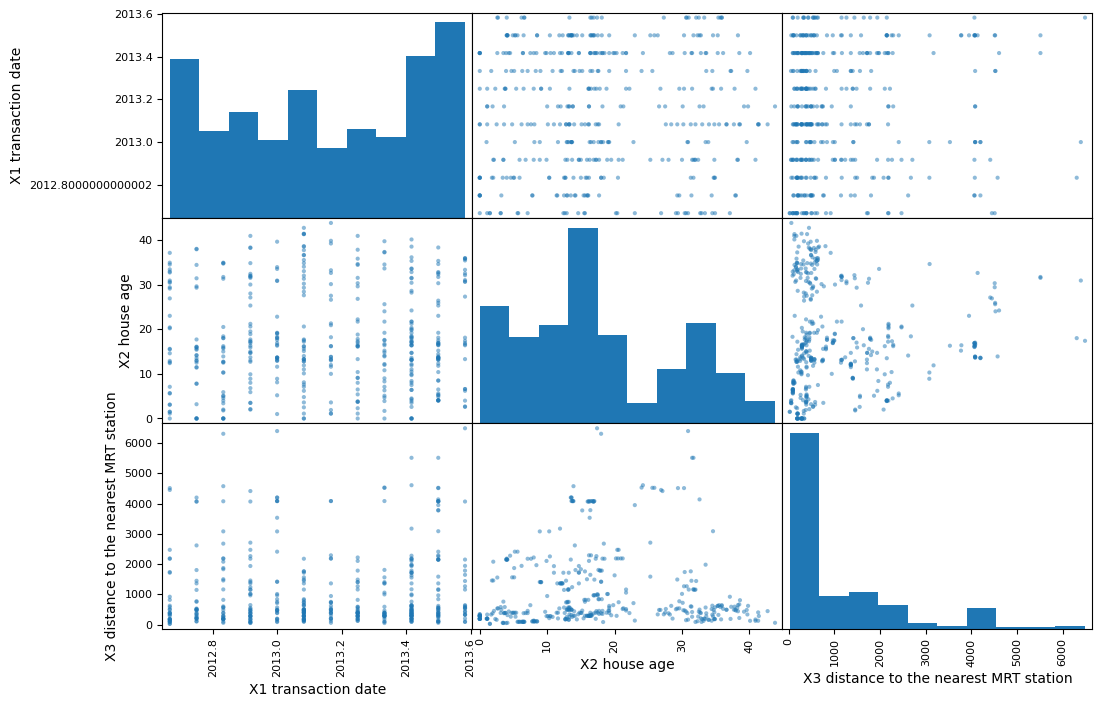

In [38]:
from pandas.plotting import scatter_matrix
attributes = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station']
scatter_matrix(df[attributes], figsize = (12,8))


<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>

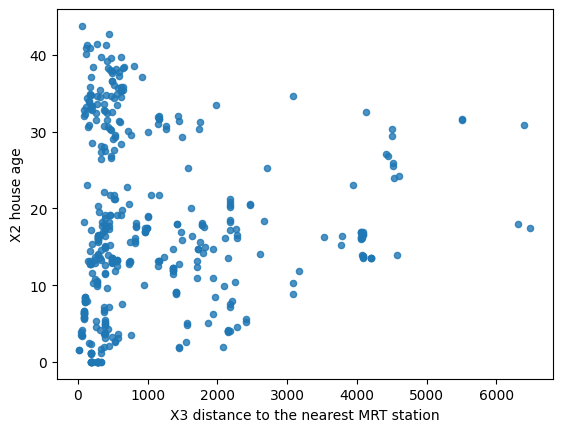

In [39]:
df.plot(kind = "scatter" , x ="X3 distance to the nearest MRT station" , y = "X2 house age",alpha = 0.8)

<Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>

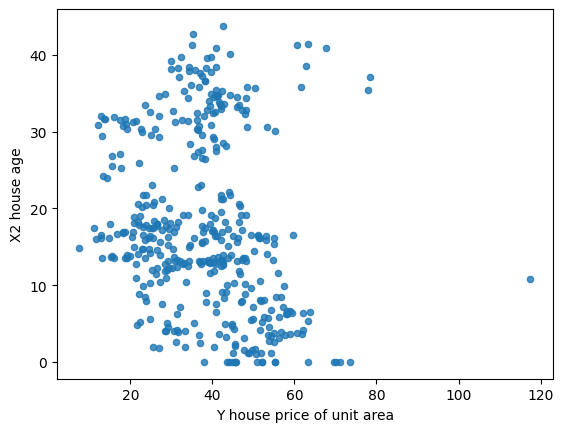

In [40]:

df.plot(kind = "scatter" , x ="Y house price of unit area"  , y = "X2 house age",alpha = 0.8)

**Creating a Pipeline  for handling missing values**

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy="mean")

# Create a pipeline with the imputer
pipeline = Pipeline([
    ('imputer', imputer)
])


import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_impute = [col for col in numerical_cols if col != 'No']

# Fit and transform the selected columns using the pipeline
df_imputed_subset = pipeline.fit_transform(df[cols_to_impute])

# To update the original DataFrame (optional, fit_transform returns a numpy array)
df[cols_to_impute] = df_imputed_subset

# Displaying the first few rows and check for missing values in the imputed columns
print("DataFrame after imputation (subset of columns):")
print(df[cols_to_impute].head())
print("\nMissing values after imputation (subset of columns):")
print(df[cols_to_impute].isnull().sum())

DataFrame after imputation (subset of columns):
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                             10.0     24.98298     121.54024   
1                              9.0     24.98034     121.53951   
2                              5.0     24.98746     121.54391   
3                              5.0     24.98746     121.54391   
4                              5.0     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1               

**Selecting a model**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy="mean")

# Create a pipeline with the imputer and the Linear Regression model
pipeline = Pipeline([
    ('imputer', imputer),
    ('linear_reg_model', LinearRegression()) # Add the model as a step
])


print("Pipeline steps after adding Linear Regression:", pipeline.steps)

print("\nLinear Regression model added to the pipeline.")

Pipeline steps after adding Linear Regression: [('imputer', SimpleImputer()), ('linear_reg_model', LinearRegression())]

Linear Regression model added to the pipeline.


In [43]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")

Data split into training and testing sets.
Training feature set shape: (331, 7)
Testing feature set shape: (83, 7)
Training target set shape: (331,)
Testing target set shape: (83,)


In [44]:

print("Training the pipeline...")
pipeline.fit(X_train, y_train)
print("Pipeline training complete.")

print("Making predictions on the test data...")
y_pred = pipeline.predict(X_test)
print("Predictions made.")


from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE) on the test set: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse:.2f}")


print("\nComparing actual vs. predicted house prices (first 5 test samples):")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Training the pipeline...
Pipeline training complete.
Making predictions on the test data...
Predictions made.

Model Evaluation:
Mean Squared Error (MSE) on the test set: 54.60
Root Mean Squared Error (RMSE) on the test set: 7.39

Comparing actual vs. predicted house prices (first 5 test samples):
     Actual  Predicted
358    45.1  47.046459
350    42.3  40.407830
373    52.2  43.374640
399    37.3  39.206004
369    22.8  26.628180


In [45]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)

pipeline.set_params(linear_reg_model=random_forest_model)

print("Pipeline steps after adding Random Forest Regressor:", pipeline.steps)

print("\nRandom Forest Regressor model added to the pipeline.")

Pipeline steps after adding Random Forest Regressor: [('imputer', SimpleImputer()), ('linear_reg_model', RandomForestRegressor(random_state=42))]

Random Forest Regressor model added to the pipeline.


In [46]:
print("Training the pipeline with Random Forest Regressor...")
pipeline.fit(X_train, y_train) # Add this line to fit the pipeline
print("Pipeline training complete.")

print("Making predictions on the test data using Random Forest Regressor...")
y_pred_rf = pipeline.predict(X_test)
print("Predictions made.")

from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"\nRandom Forest Model Evaluation:")
print(f"Mean Squared Error (MSE) on the test set: {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE) on the test set: {rmse_rf:.2f}")

# Compare actual vs. predicted values for the first few test samples
print("\nComparing actual vs. predicted house prices (Random Forest, first 5 test samples):")
comparison_df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison_df_rf.head())

Training the pipeline with Random Forest Regressor...
Pipeline training complete.
Making predictions on the test data using Random Forest Regressor...
Predictions made.

Random Forest Model Evaluation:
Mean Squared Error (MSE) on the test set: 31.86
Root Mean Squared Error (RMSE) on the test set: 5.64

Comparing actual vs. predicted house prices (Random Forest, first 5 test samples):
     Actual  Predicted
358    45.1     47.738
350    42.3     39.230
373    52.2     56.537
399    37.3     34.759
369    22.8     26.059
